In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!cd "/content/drive/My Drive/Apple"

/content/drive/My Drive/Apple


In [5]:
at = pd.read_csv('./Machine_Learning/Apple_attribute.csv') # 사과 피쳐
apple_attribute = at.to_numpy()
sw = pd.read_csv('./Machine_Learning/Apple_sweetness.csv') # 사과 당도(회귀 모델)
apple_sweetness = sw.to_numpy()
sw_c = pd.read_csv('./Machine_Learning/Apple_sweetness_c.csv') # 사과 당도(분류 모델)
apple_sweetness = sw.to_numpy()
train_input, test_input, train_target, test_target = train_test_split(apple_attribute, apple_sweetness, test_size=0.2)

poly = PolynomialFeatures(degree=2)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

In [6]:
at.head()

,1rd_red,1rd_green,1rd_blue,1rd_r,1rd_rg,1rd_most_red,1rd_least_red,1rd_most_yellow,1rd_size,2nd_red,...,6th_red,6th_green,6th_blue,6rd_r,6rd_rg,5rd_most_red.1,5rd_least_red.1,5rd_most_yellow.1,6th_size,height/area
0,184.66,90.55,44.45,49.66,230.76,157.0,-208.0,368.0,10603,143.38,...,156.53,41.70,39.84,74.99,158.39,159.0,-206.0,327.0,9859,0.929831
1,179.48,121.20,68.54,-10.26,232.14,144.0,-229.0,384.0,11573,121.90,...,155.00,56.95,48.92,49.13,163.03,151.0,-179.0,375.0,10762,0.929923
2,179.20,102.23,54.85,22.12,226.58,128.0,-127.0,378.0,11912,138.91,...,165.13,60.78,43.13,61.22,182.78,140.0,-137.0,338.0,11268,0.945937
3,189.01,172.43,74.90,-58.32,286.54,106.0,-236.0,384.0,14758,157.56,...,171.07,80.59,50.33,40.15,201.33,163.0,-233.0,361.0,14459,0.979740
4,158.74,93.24,63.79,1.71,188.19,133.0,-227.0,400.0,12750,171.02,...,130.84,43.93,56.30,30.61,118.47,144.0,-207.0,338.0,12561,0.985176


In [7]:
# target(Price)와 가장 correlated 된 features 를 k개 고르기.
## f_regresison, SelectKBest 불러오기.
from sklearn.feature_selection import f_regression, SelectKBest
## selctor 정의하기.
selector = SelectKBest(score_func=f_regression, k=50)
## 학습데이터에 fit_transform 
train_selected = selector.fit_transform(train_scaled, train_target)
## 테스트 데이터는 transform
test_selected = selector.transform(test_scaled)
train_selected.shape, test_selected.shape

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms


((160, 50), (40, 50))

In [8]:
#릿지 회귀 모델
from sklearn.linear_model import Ridge

ridge = Ridge(alpha = 10)
ridge.fit(train_selected, train_target)
print(round(ridge.score(train_selected, train_target), 4))
print(round(ridge.score(test_selected, test_target), 4))

0.351
-0.0624


In [9]:
print(test_scaled[1])

[ 0.         -1.80354731 -1.57809072 ...  0.06215472  0.17742422
  0.18988734]


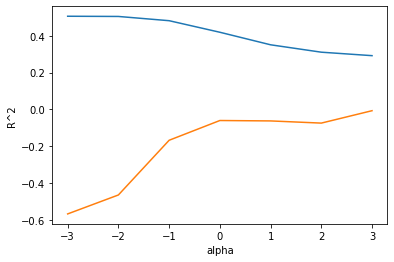

In [10]:
import matplotlib.pyplot as plt #Ridge alpha값 찾기
train_score = [] 
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
for alpha in alpha_list:
  full_ridge = Ridge(alpha=alpha)
  full_ridge.fit(train_selected, train_target)
  train_score.append(full_ridge.score(train_selected, train_target))
  test_score.append(full_ridge.score(test_selected, test_target))  
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [11]:
#라쏘 회귀 모델
from sklearn.linear_model import Lasso
full_lasso = Lasso(alpha = 0.1)
full_lasso.fit(train_scaled, train_target)
print(round(full_lasso.score(train_scaled, train_target), 4))
print(round(full_lasso.score(test_scaled, test_target), 4))

0.4554
0.1845


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.684e+00, tolerance: 2.990e-02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.977e-01, tolerance: 2.990e-02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


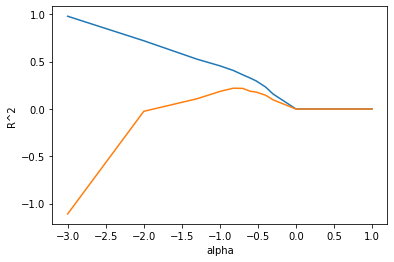

In [20]:
import matplotlib.pyplot as plt #Lasso alpha값 찾기
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.4, 0.5, 1, 10]
for alpha in alpha_list:
  full_lasso = Lasso(alpha=alpha)
  full_lasso.fit(train_scaled, train_target)
  train_score.append(full_lasso.score(train_scaled, train_target))
  test_score.append(full_lasso.score(test_scaled, test_target))  
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [13]:
!pip install XGBoost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [19]:
import xgboost as xgb
from xgboost import XGBRegressor
# 1. 모델 선언
xgb  = XGBRegressor(objective='reg:squarederror')

# 2. 모델 훈련 fit()함수
xgb.fit(train_scaled, train_target)

# 3. 모델 예측 predict()함수
Y_pred = xgb.predict(test_scaled)

# 4. score()
print(xgb.score(train_scaled, train_target))
xgb.score(test_scaled, test_target)

0.996123266708896


-0.45805323280454213

In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

grid_parameters = {
    'booster' : ['gbtree', 'dart'],
    'tree method' : ['exact'],
    'eta' : [0.1],
    'gamma' : [10],
    'max_depth' : [2, 3, 4], # 나무의 깊이
    'max_leaves' : [100, 150, 200],
    'subsample' : [0.5],
    'colsample_bytree' : [0.9, 1.1]
    }
grid_xgb = GridSearchCV(xgb, param_grid=grid_parameters, cv=3, refit=True)

grid_xgb.fit(train_scaled, train_target)

scores_df = pd.DataFrame(grid_xgb.cv_results_)
print(scores_df)

print('best parameters : ', grid_xgb.best_params_)
print('best score : ', grid_xgb.best_score_)
em = grid_xgb.best_estimator_
print(em.score(train_scaled, train_target))
print(em.score(test_scaled, test_target))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
54 fits failed out of a total of 108.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
54 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/xgboost/sklearn.py", line 396, in fit
    callbacks=callbacks)
  File "/usr/local/lib/python3.7/dist-packages/xgboost/training.py", line 216, in train
    xgb_model=xgb_model, callbacks=callbacks)
  File "/usr/local/lib/python3.7/dist-packages/xgboost/training.py", line

    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.648857      0.020541         0.002287        0.000470   
1        0.712748      0.175635         0.002251        0.000315   
2        1.080389      0.159085         0.002576        0.000413   
3        1.629334      0.037952         0.002462        0.000121   
4        1.649967      0.022676         0.004537        0.002937   
5        1.391755      0.410096         0.002024        0.000360   
6        1.033807      0.013827         0.001944        0.000336   
7        1.907511      0.177135         0.002963        0.000629   
8        2.100100      0.137167         0.008262        0.004347   
9        0.004993      0.000052         0.000000        0.000000   
10       0.004849      0.000095         0.000000        0.000000   
11       0.004990      0.000053         0.000000        0.000000   
12       0.004891      0.000205         0.000000        0.000000   
13       0.004650      0.000089         0.000000

In [16]:
!pip install bayesian-optimization

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [17]:
from bayes_opt import BayesianOptimization


xgb_parameter_bounds = {
    # 'booster' : ('gbtree', 'dart'),
    # 'tree method' : ('exact'),
    'eta' : (0.1, 0.3),
    'gamma' : (0,10),
    'max_depth' : (3, 12), # 나무의 깊이
    'max_leaves' : (100, 400),
    'subsample' : (0.5, 1.1),
    'colsample_bytree' : (0.7, 1,3)
    }

def xgb_bo(eta, gamma, max_depth, max_leaves, subsample, colsample_bytree):

  xgb_params = {
      'eta' : int(round(eta)),
      'gamma' : int(round(gamma)),
      'max_depth' : int(round(max_depth)),
      'max_leaves' : int(round(max_leaves)),
      'subsample' : int(round(subsample)),
      'colsample_bytree' : int(round(colsample_bytree))
      }

  xgb = XGBRegressor(**xgb_params)
  xgb.fit(train_scaled, train_target)
  score = xgb.score(test_scaled, test_target)

  return score

# 이제 Bayesian Optimization을 사용할 준비가 끝났습니다.
# "BO_xgb"라는 변수에 Bayesian Optmization을 저장해보세요

BO_xgb = BayesianOptimization(f = xgb_bo, pbounds = xgb_parameter_bounds,random_state = 0)

# Bayesian Optimization을 실행해보세요

BO_xgb.maximize(init_points = 8, n_iter = 8)

ValueError: ignored